# Generate Some RFI Diagnostic Plots

In [2]:
import casatools
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
# test data for diagnostic plots
qso = "QSO-J0853+0139"
ms = f"../../imaging/{qso}/selfcal/{qso}-selfcal-2.ms" 

In [29]:
tb = casatools.table()
tb.open(ms)
time = tb.getcol("TIME")
spw = tb.getcol("DATA_DESC_ID")
data = tb.getcol("DATA")
flags = tb.getcol("FLAG")
uvw = tb.getcol("UVW")
data = np.ma.array(data, mask=flags)
tb.close()

True

### Reshape and Reorder Data
Put data into shape pol x time x baseline x frequency. Reorder by baseline length.

In [30]:
print(uvw.shape)

(3, 988767)


In [31]:
ntimes = np.unique(time).shape[0]
nspw = np.unique(spw).shape[0]

# reshape
data = data.reshape(2, 64, nspw, ntimes, -1)
data = np.ma.array([data[:, i % 64, i // 64] for i in range(64 * nspw)])
data = np.moveaxis(data, 0, -1)

# compute uv-distance averaged over times and frequencies
uvdist = np.ma.mean(np.sqrt(np.sum(np.abs(uvw)**2, axis=0)).reshape(nspw, ntimes, -1), axis=(0, 1))

# reorder data
data = data[:, :, np.argsort(uvdist)]

print(data.shape)

(2, 313, 351, 576)


### Average Data
Average polarisations and baselines or times.

In [32]:
data_avg_1 = np.ma.mean(np.abs(data), axis=(0, 1))
data_avg_2 = np.ma.mean(np.abs(data), axis=(0, 2))

## Plot Diagnostic Plots

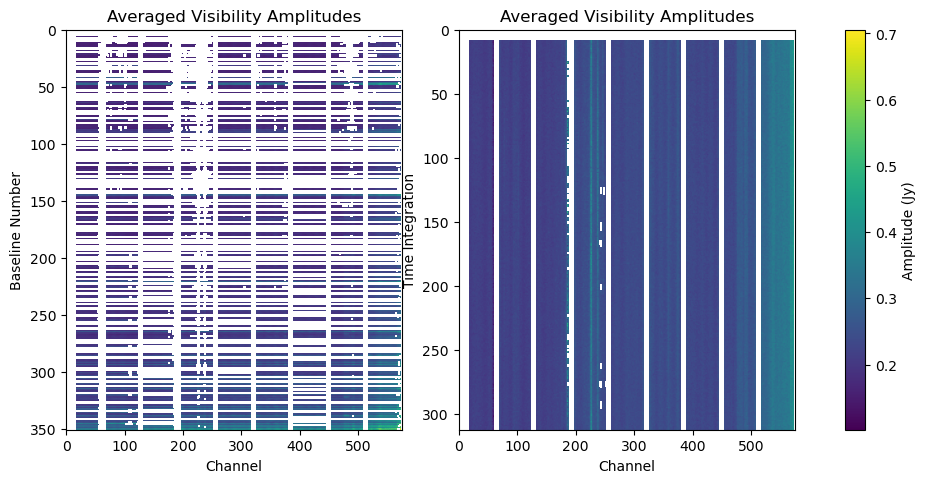

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(data_avg_1, aspect="auto")
ax1.set_title("Averaged Visibility Amplitudes")
ax1.set_xlabel("Channel")
ax1.set_ylabel("Baseline Number")

im = ax2.imshow(data_avg_2, aspect="auto")
ax2.set_title("Averaged Visibility Amplitudes")
ax2.set_xlabel("Channel")
ax2.set_ylabel("Time Integration")

plt.tight_layout()
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.02, 0.8])
plt.colorbar(im, cax=cax, label="Amplitude (Jy)")

Text(0.5, 1.0, 'Polarisation and Time-Averaged Visibilitiy Amplitudes')

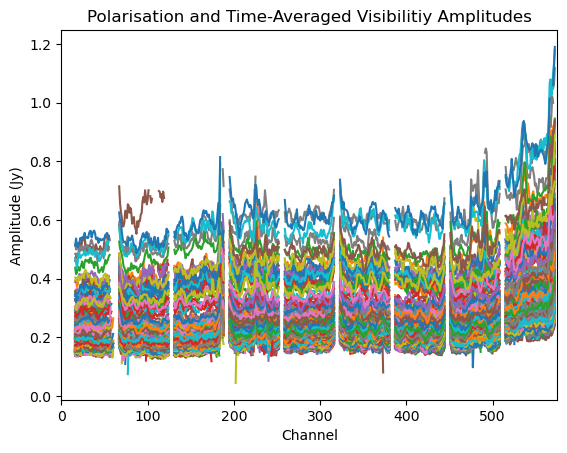

In [34]:
plt.plot(np.arange(data_avg_1.shape[-1]), data_avg_1.T)
plt.xlim([0, data_avg_1.shape[-1]-1])
plt.xlabel("Channel")
plt.ylabel("Amplitude (Jy)")
plt.title("Polarisation and Time-Averaged Visibilitiy Amplitudes")